In [65]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt
%matplotlib inline

In [124]:
entries = 0
import os

for i in range(0,10):
    diri = "digits/digit_{0}".format(i)
    print(i,":",len(os.listdir(diri)))
    entries+=len(os.listdir(diri))
    
print(entries)

0 : 88
1 : 45
2 : 90
3 : 87
4 : 93
5 : 86
6 : 82
7 : 87
8 : 85
9 : 666
1409


In [125]:
x = plt.imread("digits/digit_1/4732.png")
print(x)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.79607844 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [95]:
X = []
y = []
for i in range(0,10):
    diri = "digits/digit_{0}".format(i)
    for j in os.listdir(diri):
        X.append(plt.imread(diri+"/"+j))
        y.append(i)

In [96]:
print(len(X))
print(len(y))

1409
1409


In [97]:
import numpy as np
X = np.asarray(X, dtype = np.float32)
y = np.asarray(y, dtype = np.float32)

In [98]:
print(type(X))

<class 'numpy.ndarray'>


In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [108]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(986, 32, 32)
(986,)
(423, 32, 32)
(423,)


In [109]:
X_train = X_train.reshape(986,1024)
X_test = X_test.reshape(423,1024)

print(X_train.shape)
print(X_test.shape)

(986, 1024)
(423, 1024)


In [110]:
batch_size = 128
num_classes = 10
epochs = 100

# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

986 train samples
423 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


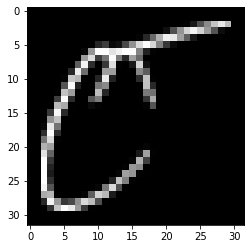

In [111]:
print("Label:",y_test[250:251])
plt.imshow(X_test[250:251].reshape(32,32), cmap='gray')
plt.show()

In [126]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(1024,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total params: 35,242
Trainable params: 35,242
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [128]:
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 2ms/step - loss: 2.2534 - accuracy: 0.4848
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 2.1297 - accuracy: 0.4878
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 1.9823 - accuracy: 0.4878
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.8331 - accuracy: 0.4878
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 1.7196 - accuracy: 0.4878
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.6552 - accuracy: 0.4878
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 1.6157 - accuracy: 0.4878
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 1.5783 - accuracy: 0.4878
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 1.5364 - accuracy: 0.4878
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 1.4908 - accuracy: 0.4878
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.8884
Epoch 85/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8844
Epoch 86/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8925
Epoch 87/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.9037
Epoch 88/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.9016
Epoch 89/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8945
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.9016
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.9047
Epoch 92/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.9016
Epoch 93/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.9037
Epoch 94/100
8/8 [===============

In [129]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4157560467720032
Test accuracy: 0.8676123023033142


In [130]:
prediction = model.predict(X_test[420:421])
prediction = prediction[0]
print('Prediction\n',prediction)
print(np.where(prediction == max(prediction)))

Prediction
 [1.0573911e-31 2.2903224e-09 0.0000000e+00 1.3123823e-13 6.1364139e-28
 1.8789784e-14 7.0430214e-31 1.6507147e-13 0.0000000e+00 1.0000000e+00]
(array([9], dtype=int64),)


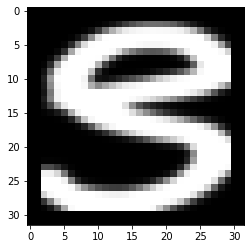

In [131]:
plt.imshow(X_test[420:421].reshape(32,32),cmap='gray')
plt.show()